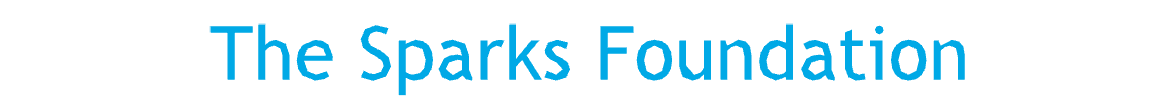

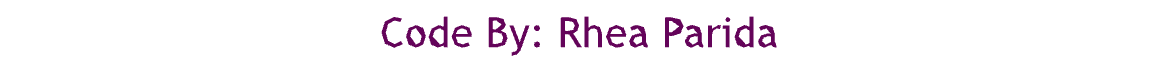

# Task-Create the Decision Tree classifier and visualize it graphically.

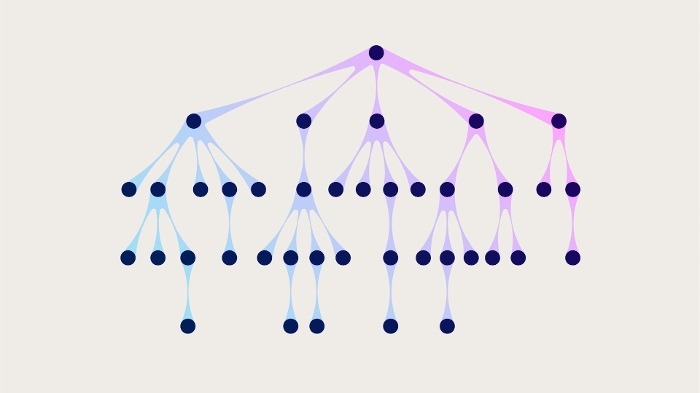

### Importing Libraries

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

### Getting the data

In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\IrisDT.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#### Thus we have 3 different species here 

### Building the model

#### Diving data to test and train

In [6]:
 #predicting variables which are Sepallength, Sepalwidth , PetalLength , PetalWidth
x = df.drop(["Species","Id"],axis=1)

#variable to be predicted
y= df["Species"] 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

Hence the original data is split into training and test (25 percent split) , that is 112 rows in training and 38 rows in test of the 150 entries in the orginal data.

Now we will build a decision tree model using our training dataset.

###  The Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtf = DecisionTreeClassifier(max_depth=3)
#keeping max no of levels = 3

dtf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

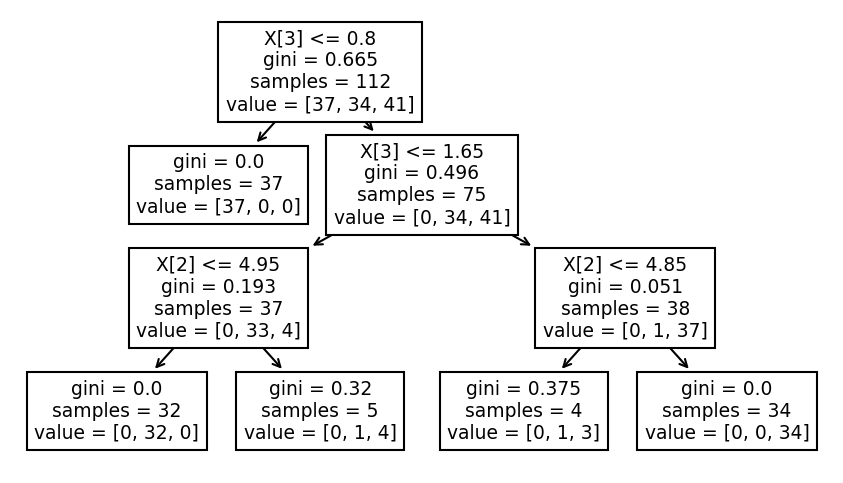

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(dtf);

In [23]:
# Putting the feature names and class names into variables
f = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
c = ['setosa', 'versicolor', 'virginica']

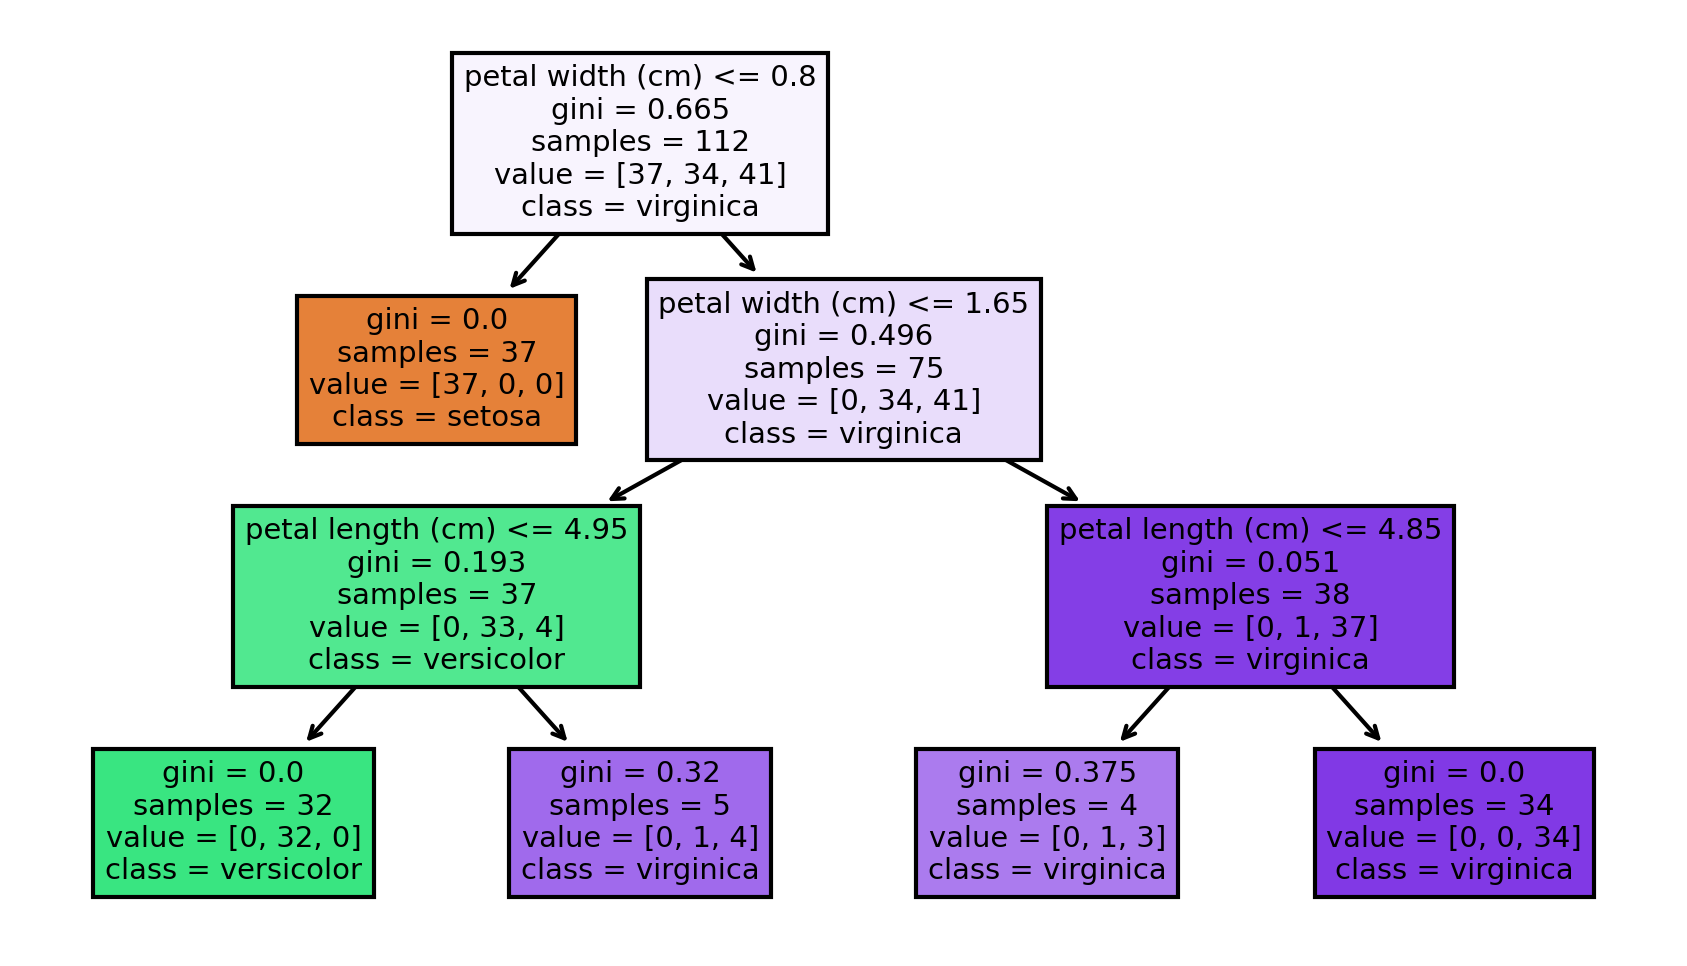

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)

tree.plot_tree(dtf,
               feature_names = f, 
               class_names=c,
               filled = True);

### Predicting the values

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
test_pred = dtf.predict(x_test) #predicting values of the test dataset

# now lets check the accuracy_score to check how fit is the model to the new data
print('Accuracy Score:', accuracy_score(y_test, test_pred))

Accuracy Score: 0.9736842105263158


In [18]:


#Comparing the predicted value and the actual value
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
df_compare.head()



,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica


Thus we have a prediction accuracy of **97.36 %** which implies that model gives an perfect prediction on the new data. In next code you can also see some of the correctly predicted values.

### Prediction on random new data

In [19]:
#predicting the species on a random new data
fl = [['4','3','3','0.2']] # Sepallength=5, Sepalwidth=3 ,PetalLength=2 , PetalWidth=0.5
new_pred = dtf.predict(fl)
print("Predicted species of flower = {}".format(new_pred[0]))

Predicted species of flower = Iris-setosa


Thus,the model predicts the species given a random value

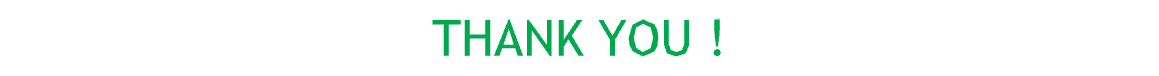